In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base import environs, transfer
#np.seterr(divide='ignore', invalid='ignore')

In [2]:
# variable definitions

alpha = 5.7634591968
c = 1
theta = np.radians(180+45)

In [3]:
#function definitions

def b_r(r):
    zero_val = - np.cos(theta) * (6 * F_0 + 2 * alpha**5 * c) / (3 * alpha**2)
    if np.any(np.isclose(r, 0)):
        try:
            zero_args = np.argwhere(np.isclose(r, 0))
            val = 2 * np.cos(theta) * f(r) / r**2
            val[zero_args] = zero_val
        except TypeError:
            val = zero_val
    else:
        val = 2 * np.cos(theta) * f(r) / r**2
    return val
    

def b_theta(r):
    zero_val = np.sin(theta) * (6 * F_0 + 2 * alpha**5 * c) / (3 * alpha**2)
    if np.any(np.isclose(r, 0)):
        try:
            zero_args = np.argwhere(np.isclose(r, 0))
            val = - np.sin(theta) * f_prime(r) / r
            val[zero_args] = zero_val
        except TypeError:
            val = zero_val
    else:
        val = - np.sin(theta) * f_prime(r) / r
    return val


def b_phi(r):
    zero_val = 0
    if np.any(np.isclose(r, 0)):
        try:
            zero_args = np.argwhere(np.isclose(r, 0))
            val =  alpha * np.sin(theta) * f(r) / r
            val[zero_args] = zero_val
        except TypeError:
            val = zero_val
    else:
        val = alpha * np.sin(theta) * f(r) / r
    return val


def f(r):
    return c * (alpha * np.cos(alpha * r) - np.sin(alpha * r) / r) \
           - F_0 * r**2 / alpha**2


def f_prime(r):
    return c * ( - alpha**2 * np.sin(alpha * r) \
                - alpha * np.cos(alpha * r) / r \
                + np.sin(alpha * r) / r**2) \
               - 2 * F_0 * r / alpha**2


F_0 = c * (alpha * np.cos(alpha) - np.sin(alpha)) * alpha**2
norm = np.sqrt((3 * F_0 + c * alpha**5)**2) * 2 / (3 * alpha**2)
scale = 8.3 / norm

In [4]:
F_0

182.66504956621472

/home/julian/anaconda3/envs/fermi3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/home/julian/anaconda3/envs/fermi3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/home/julian/anaconda3/envs/fermi3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in true_divide
/home/julian/anaconda3/envs/fermi3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide
/home/julian/anaconda3/envs/fermi3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/home/julian/anaconda3/envs/fermi3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in true_divide
/home/julian/anaconda3/envs/fermi3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value enc

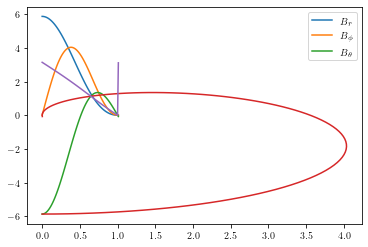

In [9]:
fig = plt.figure(1)
ax = fig.add_subplot(111)

r = np.linspace(0, 1.01, num=102)

ax.plot(r, scale * b_r(r), label='$B_r$')
ax.plot(r, scale * b_phi(r), label='$B_\phi$')
ax.plot(r, scale * b_theta(r), label=r'$B_\theta$')
ax.plot(scale * b_phi(r), scale * b_theta(r))
ax.plot(r, np.arctan2(b_phi(r), b_theta(r)))
#ax.set_ylim((-6, 6))
ax.legend()
#fig.savefig('structured_field.png', dpi=300)

In [7]:
r

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [17]:
r_supp = r.copy()

In [18]:
r_supp[1:] -=0.005
r_supp[-1] = 1

In [20]:
r_supp.shape

(102,)